In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

import sys
sys.path.append("../")

# Package for importing image representation
from PIL import Image, ImageOps

# from src.V1_reconst import generate_Y, reconstruct
import pandas as pd
import seaborn as sns
import time
import os.path
from src.compress_sensing_library import *
from src.utility_library import *

In [2]:
img_nm = 'peppers'
root = search_root()
load_V1 = '{root}/result/dct/{img}/V1/color_param_Wed_Jul_19_04_17_17_2023_dct_exp.csv'.format(root = root, img = img_nm)
load_pixel = '{root}/result/dct/{img}/pixel/color_param_Fri_May_12_16_46_28_2023.csv'.format(root = root, img = img_nm)
load_gaussian = '{root}/result/dct/{img}/gaussian/color_param_Fri_May_12_16_46_08_2023.csv'.format(root = root, img = img_nm)
directory = "num_cell_error"
save = True
data = [load_pixel, load_gaussian, load_V1]

In [3]:
V1_param_df = pd.read_csv(load_V1)

for index in V1_param_df.columns:
    if (index == 'Unnamed: 0') :
        V1_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
temp3 = V1_param_df.loc[V1_param_df['num_cell'] == 200]
avg = temp3.groupby(
    ['num_cell', 'sparse_freq', 'cell_size', 'alp'], as_index=False).mean().drop('rep', axis=1)
avg

,num_cell,sparse_freq,cell_size,alp,error
0,200,2.0,2.0,0.01,109.560058
1,200,2.0,2.0,0.10,32.282151
2,200,2.0,2.0,1.00,13.546017
3,200,2.0,2.0,10.00,14.539723
4,200,2.0,4.0,0.01,110.773096
5,200,2.0,4.0,0.10,22.574616
6,200,2.0,4.0,1.00,12.597330
7,200,2.0,4.0,10.00,14.260305
8,200,2.0,8.0,0.01,117.661893
9,200,2.0,8.0,0.10,16.247620


Process Reconstruction on (540, 540, 3) image


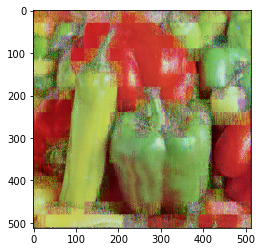

data error: 109.56005825500263
reconst error: 110.1100427729924
Process Reconstruction on (540, 540, 3) image


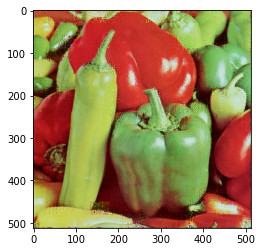

data error: 32.28215059696699
reconst error: 31.352105104383636
Process Reconstruction on (540, 540, 3) image


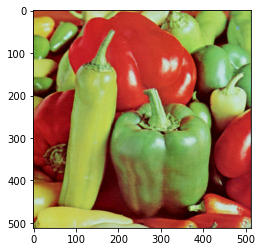

data error: 13.546017297496585
reconst error: 13.478676379728942
Process Reconstruction on (540, 540, 3) image


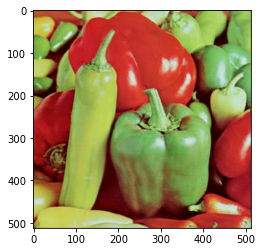

data error: 14.539722777894221
reconst error: 14.557930028722883
Process Reconstruction on (540, 540, 3) image


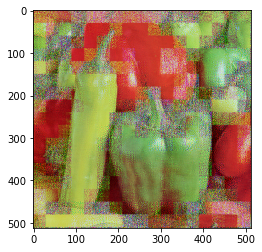

data error: 110.7730963144885
reconst error: 132.43305177585856
Process Reconstruction on (540, 540, 3) image


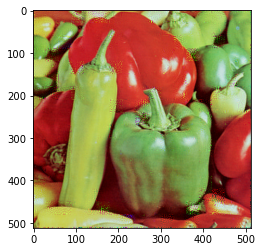

data error: 22.574616152920942
reconst error: 27.682068233838326
Process Reconstruction on (540, 540, 3) image


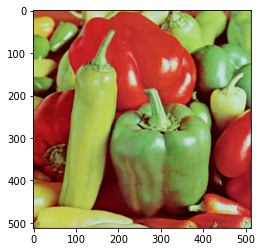

data error: 12.597330209531524
reconst error: 14.107065613795578
Process Reconstruction on (540, 540, 3) image


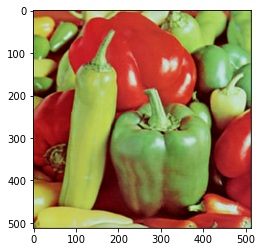

data error: 14.260304895827105
reconst error: 15.381922706299695
Process Reconstruction on (540, 540, 3) image


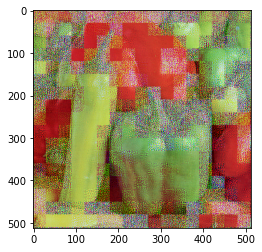

data error: 117.66189344112777
reconst error: 144.31656238889747
Process Reconstruction on (540, 540, 3) image


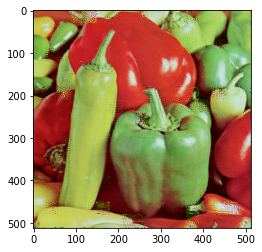

data error: 16.24761954364789
reconst error: 29.074104929010208
Process Reconstruction on (540, 540, 3) image


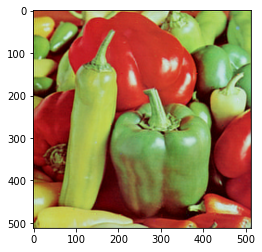

data error: 12.531627388779905
reconst error: 14.825655732601216
Process Reconstruction on (540, 540, 3) image


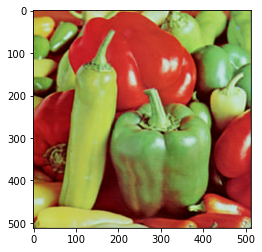

data error: 14.346676052889825
reconst error: 16.162900872801995
Process Reconstruction on (540, 540, 3) image


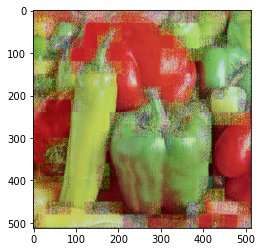

data error: 132.96972480354134
reconst error: 110.70164581150533
Process Reconstruction on (540, 540, 3) image


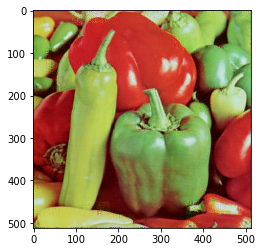

data error: 27.454094703813855
reconst error: 21.848956839584524
Process Reconstruction on (540, 540, 3) image


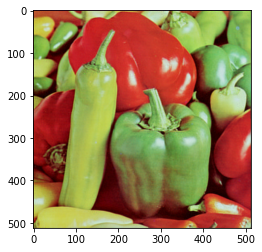

data error: 14.059283823501195
reconst error: 12.635138944428729
Process Reconstruction on (540, 540, 3) image


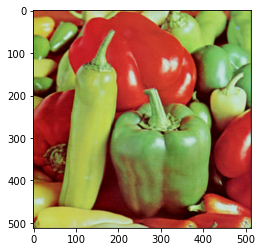

data error: 15.36634280989981
reconst error: 14.302820789118305
Process Reconstruction on (540, 540, 3) image


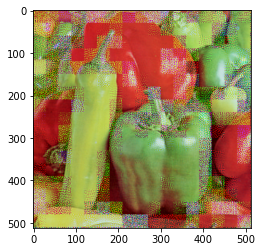

data error: 110.82863842186639
reconst error: 110.83619007262779
Process Reconstruction on (540, 540, 3) image


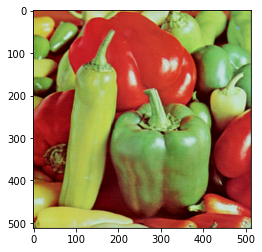

data error: 13.689590003016601
reconst error: 13.689621434351979
Process Reconstruction on (540, 540, 3) image


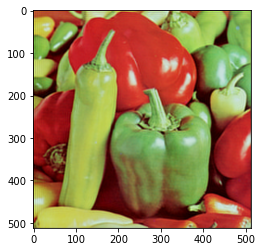

data error: 14.683268074874523
reconst error: 14.677668231096806
Process Reconstruction on (540, 540, 3) image


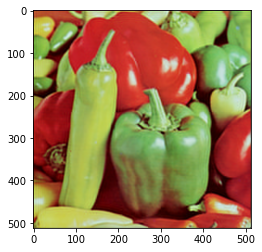

data error: 16.416448774721815
reconst error: 16.431407655211355
Process Reconstruction on (540, 540, 3) image


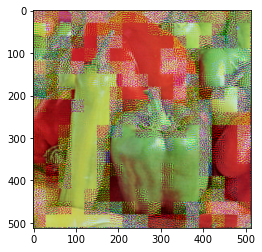

data error: 130.84713580558784
reconst error: 129.31248923256018
Process Reconstruction on (540, 540, 3) image


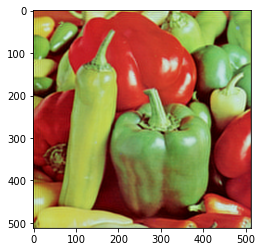

data error: 12.531924551637248
reconst error: 15.885847935893569
Process Reconstruction on (540, 540, 3) image


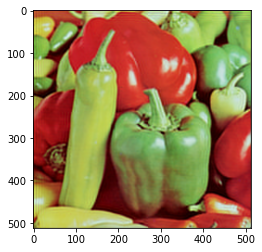

data error: 14.977757570556728
reconst error: 16.964555815647422
Process Reconstruction on (540, 540, 3) image


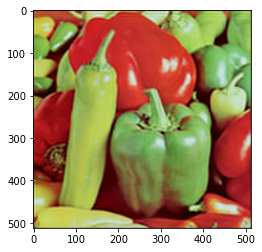

data error: 17.120600958154483
reconst error: 18.87700940482428
Process Reconstruction on (540, 540, 3) image


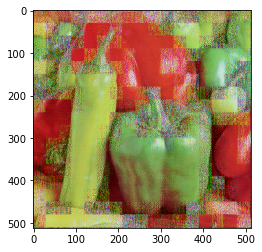

data error: 143.19454981487118
reconst error: 118.71762208937503
Process Reconstruction on (540, 540, 3) image


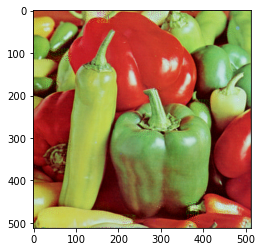

data error: 27.67190518318128
reconst error: 17.225631197367054
Process Reconstruction on (540, 540, 3) image


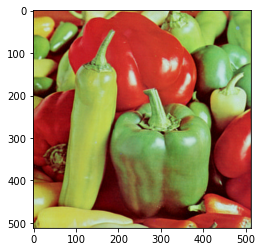

data error: 14.813640546581894
reconst error: 12.55438577684654
Process Reconstruction on (540, 540, 3) image


In [ ]:
img_arr = process_image("peppers.png", '-c')
for num_cell, cell_size, sparse_freq, alpha, data_error in avg.values:
    num_cell = int(num_cell)
    cell_size = int(cell_size)
    sparse_freq = int(sparse_freq)
#     print(num_cell, cell_size, sparse_freq, alpha, error)
    reconst = filter_reconstruct(img_arr, num_cell=num_cell, cell_size = cell_size, 
                                 sparse_freq=sparse_freq, alpha = alpha, observation = 'V1', mode = 'color')
    reconst_error = error_calculation(img_arr, reconst)
    plt.imshow(reconst)
    plt.show()
    print("data error: {data}\nreconst error: {reconst}".format(data = data_error, reconst = reconst_error))